In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Temperature data

In [5]:
temp = pd.read_csv("./weather/weather.csv")
temp['datetime'] = pd.to_datetime(temp['datetime_UTC']).dt.tz_convert('America/Los_Angeles')
temp = temp.drop(columns=['datetime_UTC', 'station_code'])
temp.set_index('datetime', inplace=True)
temp = temp.resample('15T').ffill()
temp = temp.reset_index()
temp.head()

,datetime,t_out,rh_out,dew_point,wind_s,lat,long,time_zone
0,2022-12-31 16:00:00-08:00,10.6,92.368991,9.4,5.7,37.978,-122.0311,America/Los_Angeles
1,2022-12-31 16:15:00-08:00,10.6,92.368991,9.4,5.7,37.978,-122.0311,America/Los_Angeles
2,2022-12-31 16:30:00-08:00,10.6,92.368991,9.4,5.7,37.978,-122.0311,America/Los_Angeles
3,2022-12-31 16:45:00-08:00,10.6,92.368991,9.4,5.7,37.978,-122.0311,America/Los_Angeles
4,2022-12-31 17:00:00-08:00,11.1,86.451129,8.9,5.1,37.978,-122.0311,America/Los_Angeles


Solar data

In [6]:
solar = pd.read_csv("./weather/solar.csv")
solar['datetime'] = pd.to_datetime(solar['period_end']).dt.tz_convert('America/Los_Angeles')
solar['datetime'] = solar['datetime'] - pd.Timedelta(minutes=15)
solar.set_index('datetime', inplace=True)
solar = solar.reset_index()
solar = solar.drop(columns=['period_end', 'period'])
solar.head()

,datetime,air_temp,dni,ghi
0,2022-12-31 16:00:00-08:00,11,0,46
1,2022-12-31 16:15:00-08:00,11,42,30
2,2022-12-31 16:30:00-08:00,11,0,17
3,2022-12-31 16:45:00-08:00,11,0,2
4,2022-12-31 17:00:00-08:00,11,0,0


In [7]:
df_climate = pd.merge(solar, temp, on = 'datetime', how = 'outer')
df_climate.head()

start_time = pd.Timestamp('2023-01-01 00:00:00', tz='America/Los_Angeles')
end_time = pd.Timestamp('2024-01-01 00:00:00', tz='America/Los_Angeles')

# Truncate the DataFrame
df_climate.set_index('datetime', inplace=True)
df_climate = df_climate[start_time:end_time]
df_climate.reset_index(inplace=True)
df_climate['datetime'] = df_climate['datetime'].dt.tz_localize(None)
df_climate.head()

,datetime,air_temp,dni,ghi,t_out,rh_out,dew_point,wind_s,lat,long,time_zone
0,2023-01-01 00:00:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
1,2023-01-01 00:15:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
2,2023-01-01 00:30:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
3,2023-01-01 00:45:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
4,2023-01-01 01:00:00,10.0,0.0,0.0,9.4,86.289932,7.2,1.5,37.978,-122.0311,America/Los_Angeles


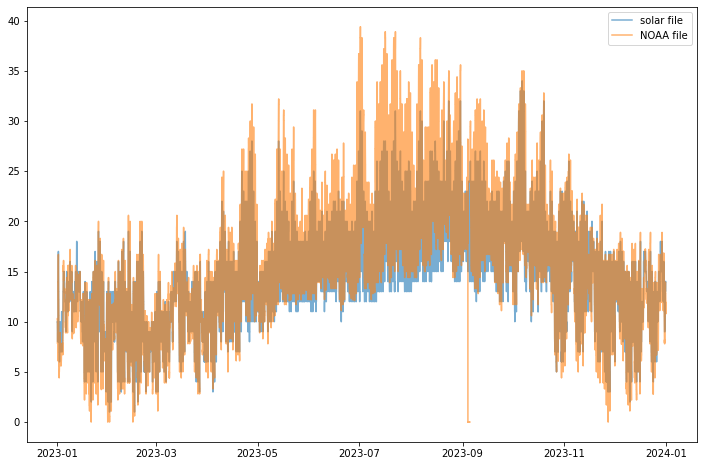

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(df_climate['datetime'], df_climate['air_temp'], label = "solar file", alpha = 0.6)
plt.plot(df_climate['datetime'], df_climate['t_out'], label = "NOAA file", alpha = 0.6)
plt.legend()

In [6]:
df_climate.to_csv("climate.csv", index=False)